## Logistic Regression
This notebook will start by covering what logistic regression is, how it works, and how to use logistic regression in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

### Load Data

The data we will use is the Breast Cancer Wisconsin (Diagnostic) Data Set: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) which I converted to a csv for convenience. The goal of this prediction is successfully classifying cancer as malignant (1) or benign (0). 

In [2]:
df = pd.read_csv('data/wisconsinBreastCancer.csv')

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Visualize Relationship between worst_concave_points and diagnosis

Text(0.5, 0, 'worst_concave_points')

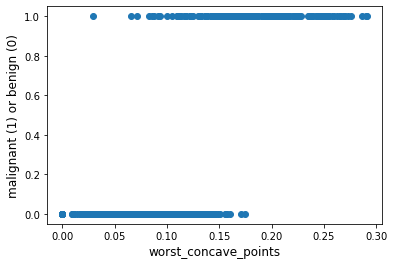

In [4]:
plt.scatter(df['worst_concave_points'], df['diagnosis'])
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('worst_concave_points', fontsize = 12)

### Exploring the name Logistic <b> Regression</b>
Linear regression was good when we wanted to predict a continuous value. This section is just showing trying using linear regression to classify and see where it falls short. malignant (1 in the graph above) or benign (0 in the graph below).

In [5]:
X = df['worst_concave_points'].values.reshape(-1,1)
y = df['diagnosis']

Text(0.5, 0, 'worst_concave_points')

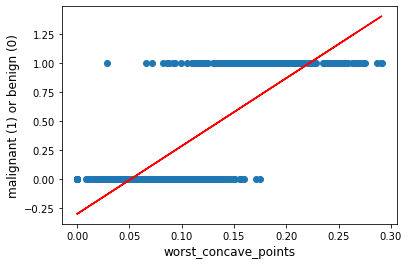

In [6]:
# Make a linear regression instance
lr = LinearRegression()

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(X,y)

# Get Predictions for original x values
# This is not how we will do it for the rest of the course.
predictions = lr.predict(X)

plt.scatter(df['worst_concave_points'], df['diagnosis'])
plt.plot(df['worst_concave_points'], predictions, color='red')


plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('worst_concave_points', fontsize = 12)

For now, around prediction value (red) >= 0.5 (around .15 for worst_concave_point), we predict a class of 1 (malignant), else we predict a class of 0 (benign).

Problem: If the value for worse_concave_points is .0, what does it mean when we have -.25 for our class instead of a 1 or zero? This seems odd. Maybe we should constrain our predictions between 0 and 1. 

### What is Logistic Regression
Linear regression: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

Logistic Regression: Bound output to 0 and 1. This will make logistic regression output the probabilities of a specific class. Probabilities can be converted into class predictions

$$y = \frac{1} {1 + e^{-(\beta_0 + \beta_1x)}}$$

This is graphed below

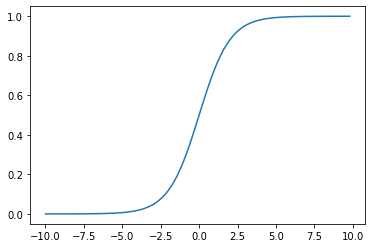

In [7]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+np.exp(-item)))
    return(a)

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x, sig)

## Showing Predictions for Logistic Regression

In [8]:
X = df['worst_concave_points'].values.reshape(-1,1)
y = df['diagnosis']

logreg = LogisticRegression(C = 1000)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg.fit(X,y)

LogisticRegression(C=1000)

Text(0.5, 0, 'worst_concave_points')

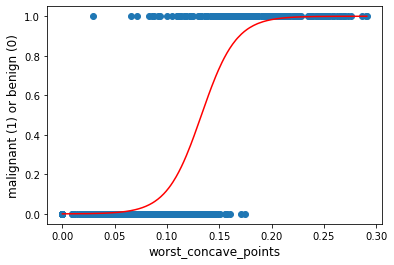

In [9]:
example_df = pd.DataFrame(data = {'worst_concave_points': df['worst_concave_points'].values,
                     'diagnosis': df['diagnosis'].values})

example_df['logistic_preds'] = pd.DataFrame(logreg.predict_proba(X))[1]
example_df = example_df.sort_values(['logistic_preds'])

plt.scatter(example_df['worst_concave_points'], example_df['diagnosis'])
plt.plot(example_df['worst_concave_points'], example_df['logistic_preds'].values, color='red')

plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('worst_concave_points', fontsize = 12)

In [19]:
example_df

,worst_concave_points,diagnosis,logistic_preds
568,0.0000,0,0.000322
314,0.0000,0,0.000322
473,0.0000,0,0.000322
538,0.0000,0,0.000322
192,0.0000,0,0.000322
...,...,...,...
202,0.2733,1,0.999795
352,0.2756,1,0.999822
82,0.2867,1,0.999909
181,0.2903,1,0.999927


If this is unclear, check out the visualization below.

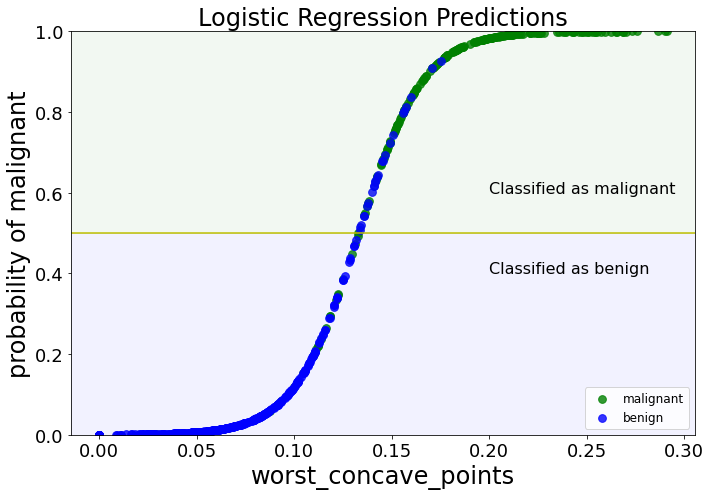

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


malignantFilter = example_df['diagnosis'] == 1
benignFilter = example_df['diagnosis'] == 0

ax.scatter(example_df.loc[malignantFilter, 'worst_concave_points'].values,
            example_df.loc[malignantFilter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           alpha = .8,
           label = 'malignant')


ax.scatter(example_df.loc[benignFilter, 'worst_concave_points'].values,
            example_df.loc[benignFilter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           alpha = .8,
           label = 'benign')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.2, .6, 'Classified as malignant', fontsize = 16)
ax.text(0.2, .4, 'Classified as benign', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('worst_concave_points', fontsize = 24)
ax.set_ylabel('probability of malignant', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()
#fig.savefig('LogisticRegressionPredictions.png', dpi = 1000)

<b>Advantages of logistic regression:</b>

Able to interpret how the model makes predictions

Model training and prediction are relatively fast

No tuning is usually needed (excluding regularization)

Can perform well with a small number of observations

Outputs well-calibrated predicted probabilities

<b>Disadvantages of logistic regression:</b>

Presumes a linear relationship between the features and the log odds of the response

Performance is usually not competitive with the best supervised learning methods

### Evaluation Metrics

We have previously used accuracy to assess how good our classifier was for decision trees. This is a common classification metric across classification models. 

Accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data point

In [10]:
score = logreg.score(X, y)
print(score)

0.9068541300527241


Accuracy is one metric, but it doesn't say give much insight into what was wrong. We also previously looked into a confusion matrix. Let's look at this in more detail before getting into new topics. 

In [11]:
cm = metrics.confusion_matrix(y, logreg.predict(X))

(2.5, -0.5)

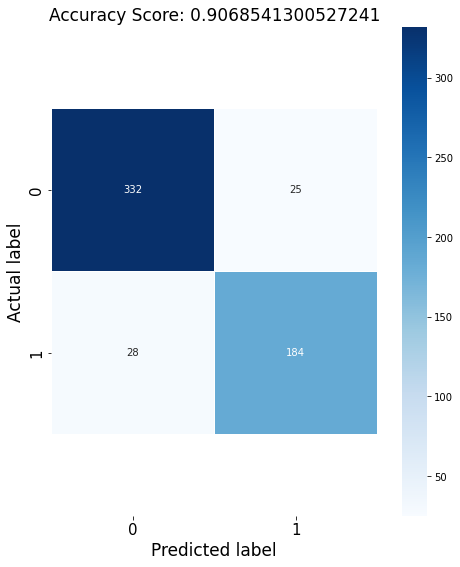

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

Let's look at the same information in a table in another manner. 

In [13]:
# ignore this code

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

(2.5, -0.5)

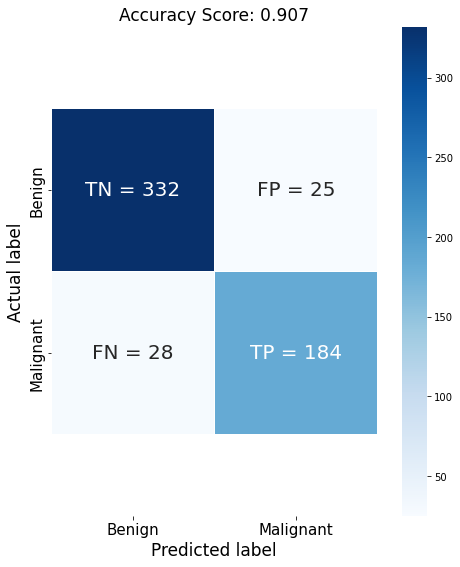

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Benign', 'Malignant'],
            yticklabels = ['Benign', 'Malignant'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

<b>True negatives (TN):</b> We predicted benign (no) and the cancer is actually benign (no). Model **does not** predict a case (and the case **is not** true in the data)

<b>False positives (FP):</b> We predicted malignant (yes) and the cancer is actually benign (no). Model **predicts** a case (and the case **is not** true in the data)

<b>False negatives (FN):</b> We predicted benign (no) and the cancer is actually malignant (yes). Model **does not** predict a case (and the case **is true** in the data)

<b>True positives (TP):</b> We predicted malignant (yes) and the cancer is actually malignant (yes). Model **predicts** a case (and the case **is true** in the data)

Using those values, we can compute the **sensitivity** and **specificity** of our model:

\begin{equation*}
Sensitivity = \frac { True Positives }{ True Positives+False Negatives } 
\end{equation*}

\begin{equation*}
Specificity = \frac { TrueNegatives }{ TrueNegatives+FalsePositives } 
\end{equation*}

In [15]:
true_pos = cm[1,1]
false_pos = cm[0,1]
true_neg = cm[0,0]
false_neg = cm[1,0]

# Calculate Sensitivity, specificity
sensitivity = true_pos / (true_pos + false_neg)
specificity = true_neg / (true_neg + false_pos)

print('Sensitivity: {:.3f}'.format(sensitivity))
print('Specificity: {:.3f}'.format(specificity))

Sensitivity: 0.868
Specificity: 0.930


**Sensitivity**, also referred to as the true positive rate, tells us, of all of the **cases in the data**, how many did we accurately predict? This indicates the model's **ability to detect cases**. In other words, how **sensitively** does the model pick up on cases?

**Specificity**, also referred to as the true negative rate, tells us, of all of the **non-cases in the data**, how many did we accurately predict? This indicates the model's ability to assign non-cases.

In [16]:
type_one_error = 1 - specificity
type_two_error = 1 - sensitivity
print('Type 1 Error Rate: {:.3f}'.format(type_one_error))
print('Type 2 Error Rate: {:.3f}'.format(type_two_error))

Type 1 Error Rate: 0.070
Type 2 Error Rate: 0.132


These metrics are directly used to calculate **Type I and Type II error rate**, which are analagous to Type I and Type II errors in statistical tests. 

> **Type I Error** rate is the proportion of instances which are **incorrectly classified as positive cases** (relative to the total number of **negative cases**). It is calculated as $1-specificity$, or simply the false positives relative to the total non-cases in the data, $FP/N$.

> **Type II Error** rate is the proportion of instances which are **incorrectly classified as negative cases** (relative to the total number of **positive cases**). It is calculated as $1-sensitivity$, or simply the false negatives relative to the total cases in the data, $FN/P$.

Part of this lecture was modified from [Michael Freeman's work](https://github.com/mkfreeman)

### Checking Understanding

#### Question
Give an example when we care about sensitivity (true positive rate), but not as much about specificity (true negative rate).

#### Answer
If we are diagnosing cancer we prefer to have false positives, predict a cancer when there is no cancer, that can be later corrected with a more specific test.

#### Question
Give an example when we care about specificity (true negative rate), but not as much about sensitivity (true positive rate).

#### Answer

If we are doing spam detection, we want to be precise. Anything that we remove from an inbox must be spam, which may mean accepting fewer true positives.

### Trading True Positives and True Negatives

By default, and with respect to the underlying assumptions of logistic regression, we predict a positive class when the probability of the class is greater than .5 and predict a negative class otherwise.

#### Question

What if we decide to use .2 as a threshold for picking the positive class? 

We will predict more positive classes, but fewer true negatives.

#### ROC Curve
It is common to compare the _true positive rate_ (sensitivity) to the _false positive rate_ (1 - specificity) at each **threshold** for classification in an ROC Curve.

* Useful to help choose a threshold that appropriately balances sensitivity and specificity.
* Harder to use when there are more than two classes

In [17]:
# Generate data for the ROC curve using the `metrics.roc_curve` function
fpr, tpr, thresholds  = metrics.roc_curve(example_df['diagnosis'], example_df['logistic_preds'])

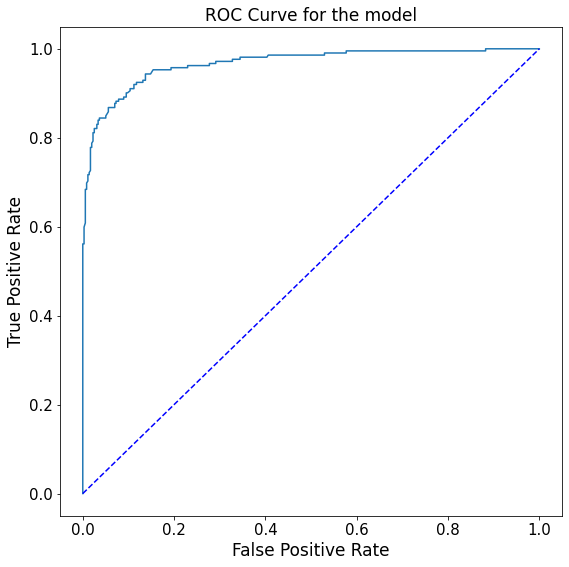

In [18]:
# Draw your ROC curve
plt.figure(figsize=(9,9))
plt.title("ROC Curve for the model", fontsize = 17)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'b--')
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.tick_params(labelsize= 15)